In [1]:
conda activate capita_elastix


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

In [3]:
pip install imageio

In [4]:
conda install git

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install git+https://github.com/tueimage/elastix-py

  Cloning https://github.com/tueimage/elastix-py to c:\users\raque\appdata\local\temp\pip-req-build-2dgytykj
  Resolved https://github.com/tueimage/elastix-py to commit 85f39835be465d75832f4575cc2ebc7f0a56f37f
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/tueimage/elastix-py 'C:\Users\raque\AppData\Local\Temp\pip-req-build-2dgytykj'


In [6]:
import os
from __future__ import print_function, absolute_import
import elastix
import matplotlib.pyplot as plt
import numpy as np
import imageio
import SimpleITK as sitk


In [7]:
import elastix

ELASTIX_PATH = os.path.join('C:/Users/raque/OneDrive/Escritorio/UU/capita/elastix-5.0.0-win64/elastix.exe')

In [8]:
if not os.path.exists(ELASTIX_PATH):
    raise IOError('Elastix cannot be found, please set the correct ELASTIX_PATH.')

In [9]:
if os.path.exists('results') is False:
    os.mkdir('results')

In [71]:
el = elastix.ElastixInterface(elastix_path=ELASTIX_PATH)

In [72]:
fixed_image_path = 'C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/p102/mr_bffe.mhd'
moving_image_path = 'C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/p102/prostaat.mhd'
parameter_file_path = 'C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/parameters_bspline_multires_3d.txt'


In [73]:
el.register(
    fixed_image=fixed_image_path,
    moving_image=moving_image_path,
    parameters=[parameter_file_path],
    output_dir='results')



C:/Users/raque/OneDrive/Escritorio/UU/capita/elastix-5.0.0-win64/elastix.exe -f C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/p102/mr_bffe.mhd -m C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/p102/prostaat.mhd -p C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/parameters_bspline_multires_3d.txt -out results


ElastixError: Elastix crashed with code 1 for command 'C:/Users/raque/OneDrive/Escritorio/UU/capita/elastix-5.0.0-win64/elastix.exe -f C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/p102/mr_bffe.mhd -m C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/p102/prostaat.mhd -p C:/Users/raque/OneDrive/Escritorio/UU/capita_selecta_medical_tue/TrainingData/parameters_bspline_multires_3d.txt -out results'.

In [74]:
result_path = os.path.join('results', 'result.0.mhd')

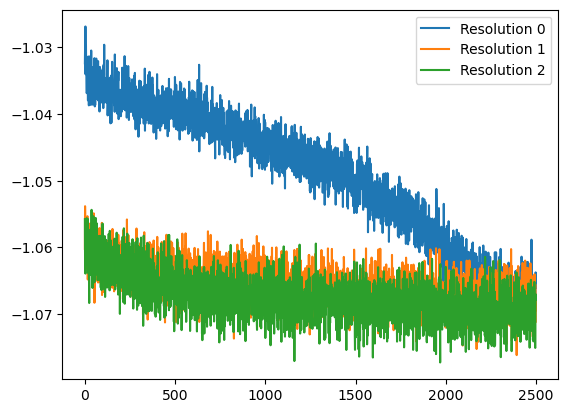

In [75]:
for i in range(3):
    log_path = os.path.join('results', 'IterationInfo.0.R{}.txt'.format(i))
    log = elastix.logfile(log_path)
    # Plot the 'metric' against the iteration number 'itnr'
    plt.plot(log['itnr'], log['metric'])
plt.legend(['Resolution {}'.format(i) for i in range(5)])

In [69]:
fixed_image = imageio.v2.imread(fixed_image_path)[40,:,:]
moving_image = imageio.v2.imread(moving_image_path)[40,:,:]
transformed_moving_image = imageio.v2.imread(result_path)[40,:,:]

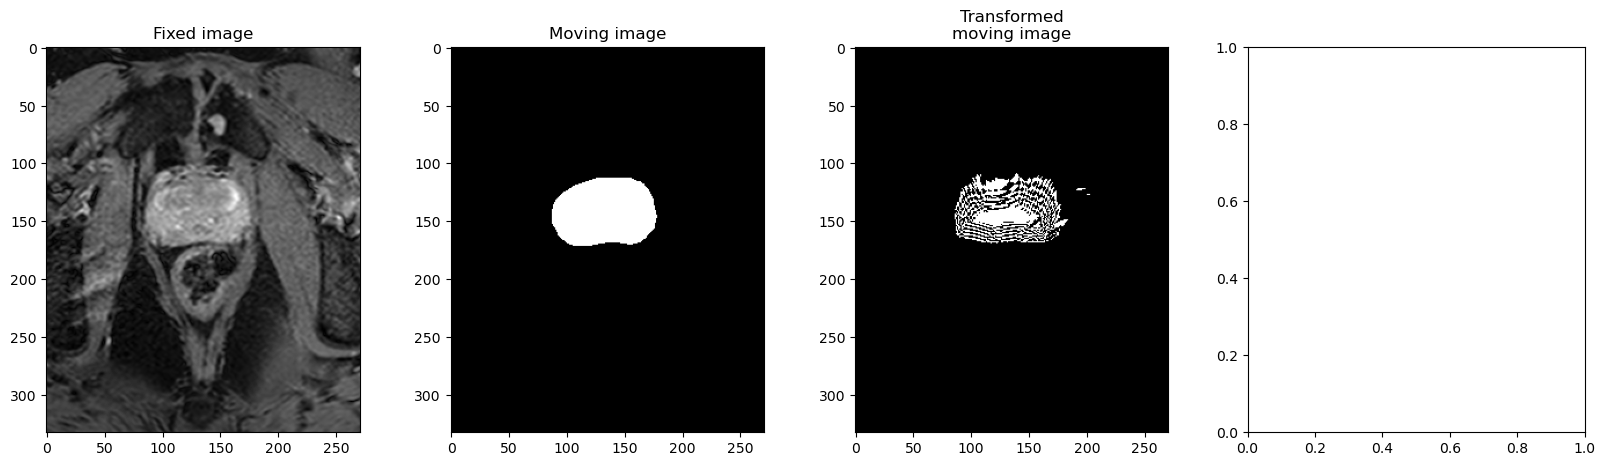

In [70]:
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].imshow(fixed_image, cmap='gray')
ax[0].set_title('Fixed image')
ax[1].imshow(moving_image, cmap='gray')
ax[1].set_title('Moving image')
ax[2].imshow(transformed_moving_image, cmap='gray')
ax[2].set_title('Transformed\nmoving image')

plt.show()